In [ ]:
Data preprocess

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


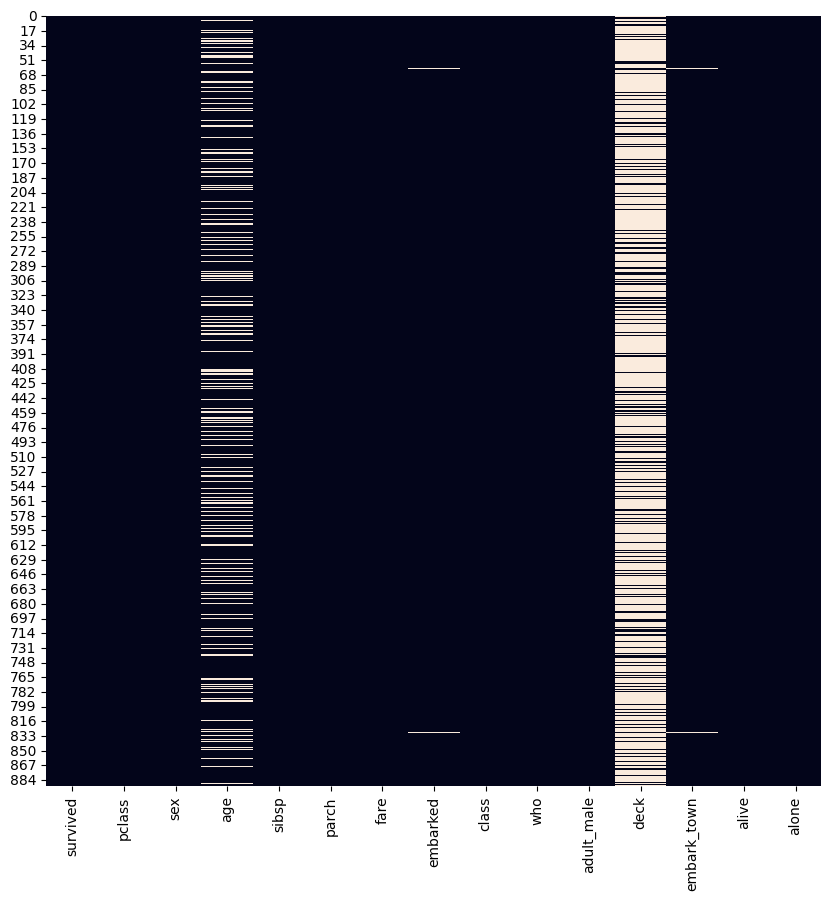

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cbar=False)
plt.show()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [14]:
data.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [17]:
#filling the empty data in age column with median
data['age']=data['age'].fillna(data['age'].median())

In [24]:
#dropping the column deck
data.drop('deck',axis=1,inplace = True)

In [27]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [46]:
#filling the empty town with its mode 
data['embark_town']= data['embark_town'].fillna(data['embark_town'].mode()[0])


In [53]:
# filling the empty embarked with its mode 
data.embarked =data.embarked.fillna(data.embarked.mode()[0])

In [54]:
data.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [55]:
from sklearn.impute import SimpleImputer

In [69]:
data1 = sns.load_dataset('titanic')
data1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [70]:
data1.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

Univariate by sklearn library

In [59]:
impute = SimpleImputer(strategy='mean')
data1['age'] = impute.fit_transform(data[['age']])
data1.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

Multivariate by sklearn 

In [62]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [72]:
imputer= IterativeImputer(max_iter=20,n_nearest_features=5)
data1.age = imputer.fit_transform(data1[['age']])

In [73]:
data1.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64